In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, torch, torchvision

Software,Version
Python,3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython,7.0.1
OS,Darwin 18.0.0 x86_64 i386 64bit
numpy,1.15.2
dlib,19.16.0
matplotlib,3.0.0
imageio,2.4.1
gaze,The 'gaze' distribution was not found and is required by the application
torch,0.4.1
torchvision,0.2.1


# training the model on the cropped faces

In [4]:
from gaze import init
epochs = 400
args = init(verbose=0, epochs=epochs)
path = '_Regard_400.pt'

In [5]:
from gaze import init
#epochs = 400
#args = init(verbose=0, epochs=epochs)
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'dataset_folder': 'dataset', 'dataset_faces_folder': 'dataset_faces', 'batch_size': 8, 'test_batch_size': 1, 'size_test_set': 0.2, 'epochs': 60, 'do_adam': False, 'lr': 0.025, 'momentum': 0.05, 'no_cuda': False, 'num_processes': 1, 'seed': 42, 'log_interval': 0, 'fullsize': 75, 'crop': 64, 'size': 64, 'mean': 0.6, 'std': 0.3, 'conv1_dim': 9, 'conv1_kernel_size': 18, 'conv2_dim': 36, 'conv2_kernel_size': 14, 'bn1_momentum': 0.5, 'bn2_momentum': 0.5, 'stride1': 2, 'stride2': 4, 'N_cv': 8, 'dimension': 30, 'verbose': 1}


In [6]:
!ls -l {path}
#!rm {path}

ls: _Regard.pt: No such file or directory


In [7]:
from gaze import ML
ml = ML(args)
ml.train(path=path)

Found 1599 sample images;  1280  to train 319 to test


Train Epoch:   0%|          | 0/60 [00:00<?, ?it/s]

Training model...


Train Epoch: 100%|██████████| 60/60 [09:34<00:00,  9.09s/it]

Model saved at _Regard.pt


## testing the model

In [8]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))

Accuracy=93.7%


Showing the one which are wrong:

## showing the images which are wrongly classified

For  dataset/blink/2018-09-14_Laurent_007.png , Pred = center True = blink , P= ['0.000', '0.678', '0.322', '0.000']


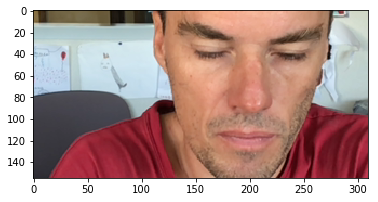

For  dataset/blink/2018-09-14_Laurent_006.png , Pred = center True = blink , P= ['0.124', '0.775', '0.001', '0.101']


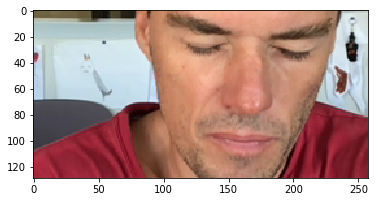

For  dataset/blink/2018-09-05_Laurent_228.png , Pred = center True = blink , P= ['0.081', '0.918', '0.000', '0.001']


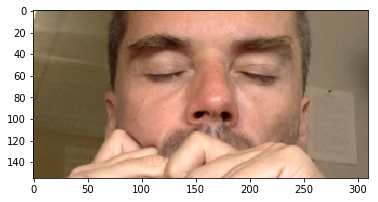

For  dataset/blink/2018-09-14_Laurent_141.png , Pred = left True = blink , P= ['0.000', '0.048', '0.952', '0.000']


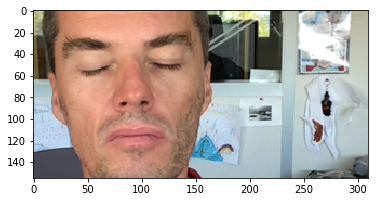

For  dataset/blink/2018-09-14_Laurent_023.png , Pred = center True = blink , P= ['0.112', '0.591', '0.297', '0.000']


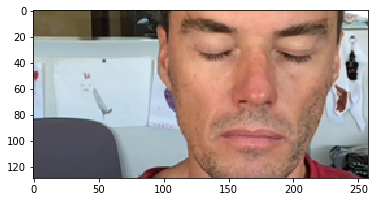

For  dataset/blink/2018-09-05_Laurent_050.png , Pred = right True = blink , P= ['0.295', '0.002', '0.000', '0.703']


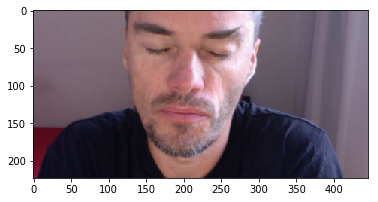

For  dataset/center/2018-10-03_Laurent_084.png , Pred = blink True = center , P= ['0.529', '0.471', '0.000', '0.000']


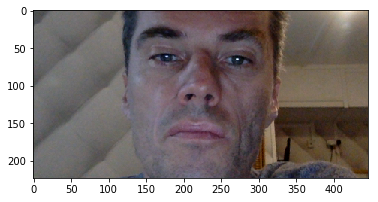

For  dataset/center/2018-10-03_Laurent_045.png , Pred = blink True = center , P= ['1.000', '0.000', '0.000', '0.000']


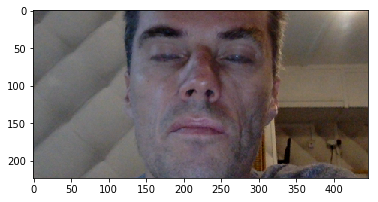

For  dataset/center/2018-09-05_Laurent_104.png , Pred = right True = center , P= ['0.000', '0.218', '0.000', '0.782']


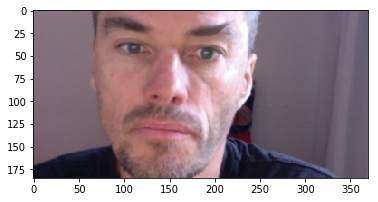

For  dataset/center/2018-09-14_Laurent_074.png , Pred = blink True = center , P= ['0.594', '0.065', '0.000', '0.341']


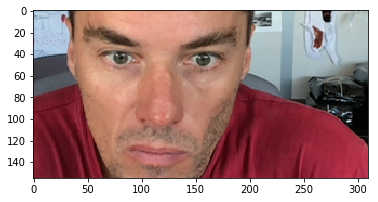

For  dataset/center/2018-09-05_Laurent_163.png , Pred = blink True = center , P= ['1.000', '0.000', '0.000', '0.000']


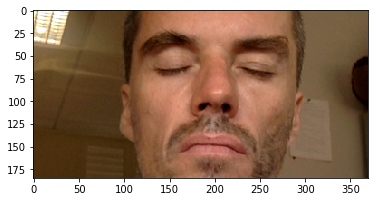

For  dataset/center/2018-09-14_Laurent_149.png , Pred = right True = center , P= ['0.000', '0.142', '0.000', '0.858']


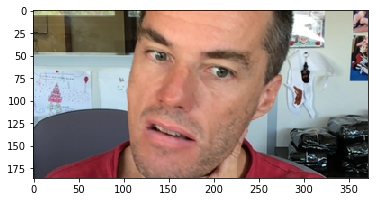

For  dataset/left/2018-09-05_Laurent_107.png , Pred = center True = left , P= ['0.000', '0.987', '0.013', '0.000']


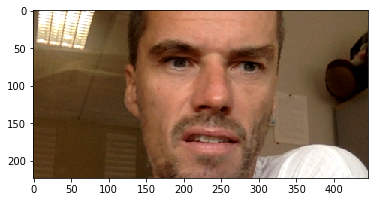

For  dataset/left/2018-09-14_Laurent_172.png , Pred = center True = left , P= ['0.000', '0.950', '0.050', '0.000']


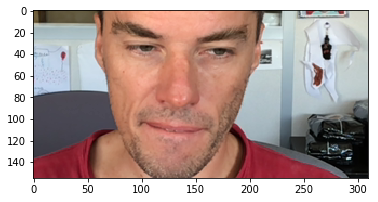

For  dataset/left/2018-09-14_Laurent_224.png , Pred = blink True = left , P= ['0.837', '0.003', '0.000', '0.160']


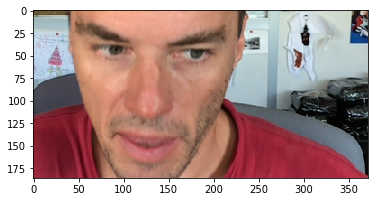

For  dataset/left/2018-09-14_Laurent_225.png , Pred = center True = left , P= ['0.000', '0.876', '0.124', '0.000']


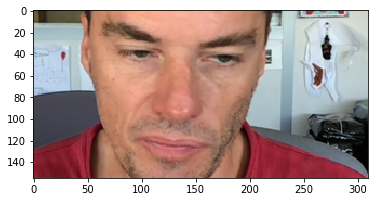

For  dataset/left/2018-09-05_Laurent_218.png , Pred = center True = left , P= ['0.007', '0.993', '0.000', '0.000']


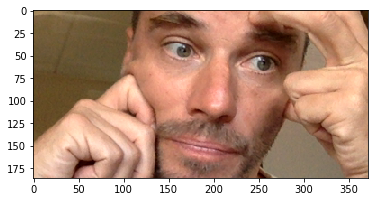

For  dataset/left/2018-09-05_Laurent_132.png , Pred = center True = left , P= ['0.000', '0.999', '0.001', '0.000']


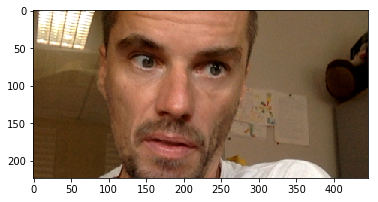

For  dataset/right/2018-09-05_Laurent_102.png , Pred = center True = right , P= ['0.000', '0.878', '0.122', '0.000']


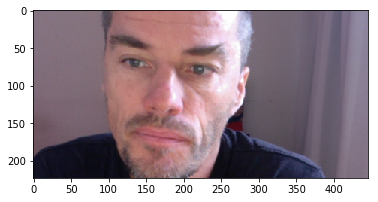

For  dataset/right/2018-09-14_Laurent_026.png , Pred = center True = right , P= ['0.000', '0.960', '0.039', '0.002']


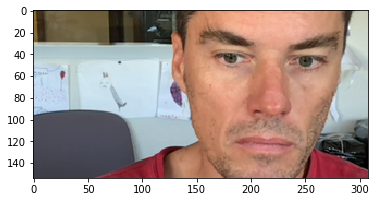

In [9]:
import time
import os
import glob
import imageio
from gaze import FaceExtractor
FE = FaceExtractor()
timings = []
wrongs = []
for target in ml.dataset.classes:
    for filename in glob.glob(os.path.join(args.dataset_folder, target) + '/*.png'):
        frame = imageio.imread(filename)
        img_face = FE.face_extractor(frame)
        pred = ml.classify(img_face, ml.dataset.test_transform)
        pred_label = ml.dataset.dataset.classes[pred.argmax()]
        if not pred_label == target:
            wrong = dict(filename=filename, pred_label=pred_label, target=target)
            wrongs.append(wrong)
            print('For ', filename, ', Pred =', pred_label, 'True =', target, ', P=', ['%.3f' % p for p in pred])
            plt.imshow(img_face)
            plt.show()

## skim through images which were wrongly classified

Some images were obviously misclassified at the supervision level, let's try to fix that.

In [10]:
print(wrong)

{'filename': 'dataset/right/2018-09-14_Laurent_026.png', 'pred_label': 'center', 'target': 'right'}


In [13]:

print(len(wrongs))

20


In [12]:
toto

NameError: name 'toto' is not defined

In [ ]:
from ipywidgets import interact
def browse_images(wrongs):
    n = len(wrongs)
    def view_image(i):
        img_face = imageio.imread(wrongs[i]['filename'])
        plt.imshow(img_face)
        plt.title('Pred: %s / True: %s ' % (wrongs[i]['pred_label'], wrongs[i]['target']))
        plt.show()
    interact(view_image, i=(0,n-1))

browse_images(wrongs)

In [ ]:
def view_image(wrong):
    filename = wrong['filename']
    filename_face = filename.replace(args.dataset_folder, args.dataset_faces_folder)
    img_face = imageio.imread(filename_face)
    plt.imshow(img_face)
    plt.title('Pred: %s / True: %s ' % (wrong['pred_label'], wrong['target']))
    plt.show()
view_image(wrong)    

In [ ]:
from IPython.display import display
import ipywidgets as widgets

toggle = widgets.ToggleButtons(options=['Wait', 'Next', 'Remove', 'Change'],
    description='Action:',)

display(toggle)

def on_click(change):
    print(change['new']) 
    if toggle.value == 'Remove':
        print('removing...', toggle.value)
        return True
    else:
        return False
    
toggle.observe(on_click, 'value')
print(exit)
if exit:
    toggle.close()

In [ ]:

class ClickResponsiveToggleButtons(widgets.ToggleButtons):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._click_handlers = widgets.CallbackDispatcher()
        self.on_msg(self._handle_button_msg)
        pass

    def on_click(self, callback, remove=False):
        """Register a callback to execute when the button is clicked.

        The callback will be called with one argument, the clicked button
        widget instance.

        Parameters
        ----------
        remove: bool (optional)
            Set to true to remove the callback from the list of callbacks.
        """
        self._click_handlers.register_callback(callback, remove=remove)

    def _handle_button_msg(self, _, content, buffers):
        """Handle a msg from the front-end.

        Parameters
        ----------
        content: dict
            Content of the msg.
        """
        if content.get('event', '') == 'click':
            self._click_handlers(self)
            
@interact
def clicked(toggle=widgets.ToggleButtons(options=['Wait', 'Next', 'Remove', 'Change'])):
    print(toggle)

In [ ]:
@interact
def clicked(toggle=widgets.ToggleButtons(options=['Wait', 'Next', 'Remove', 'Change'],
    description='Action:',)):
    try:
        print(toggle, i)
    except:
        i = 0
        n = len(wrongs)

    view_image(wrongs[i])
    if toggle == 'Next': i = (i+1) % n
    

In [ ]:
import time
for i, wrong in enumerate(wrongs[:10]):
    view_image(wrong)
    
    toggle = widgets.ToggleButtons(options=['Wait', 'Next', 'Remove', 'Change'],
                                    description='Action:',)
    display(toggle)
    while True: #(toggle.value == 'Wait'):
        if toggle.value == 'Remove':
            print('removing...', toggle.value)
        elif toggle.value == 'Change':
            print('Changeing...', toggle.value)
        elif toggle.value == 'Next':
            break
        else:
            print(toggle.value)
            time.sleep(1)
            
    toggle.close()

In [ ]:
for i, wrong in enumerate(wrongs[:10]):
    view_image(wrong)
    @interact
    def clicked(toggle=widgets.ToggleButtons(options=['Wait', 'Next', 'Remove', 'Change'])):
        print(toggle, i)
        
    toggle.close()

In [ ]:
    while True: #(toggle.value == 'Wait'):
        if toggle.value == 'Remove':
            print('removing...', toggle.value)
        elif toggle.value == 'Change':
            print('Changeing...', toggle.value)
        elif toggle.value == 'Next':
            break
        else:
            print(toggle.value)
            time.sleep(1)
            
        

In [ ]:
toggle.value

In [ ]:

from IPython.display import display
from ipywidgets import interactive
def f(a, b):
    display(a + b)
    return a+b

w = interactive(f, a=10, b=20)
display(w)

In [ ]:
def view_image(wrong):
    filename = wrong['filename']
    filename_face = filename.replace(args.dataset_folder, args.dataset_faces_folder)
    img_face = imageio.imread(filename_face)
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    ax.imshow(img_face)
    ax.title('Pred: %s / True: %s ' % (wrong['pred_label'], wrong['target']))
    #plt.show()


from IPython.display import display
from ipywidgets import interactive
def f(i, b):
    view_image(wrongs[i])
    if b == 'Remove':
        print('removing...', b)
    elif b == 'Change':
        print('Changeing...', b)
    #display(b)
    return b

w = interactive(f, i=widgets.IntSlider(min=0, max=len(wrongs)-1, step=1, value=0), b=widgets.ToggleButtons(options=['Keep', 'Remove', 'Change']))
display(w)

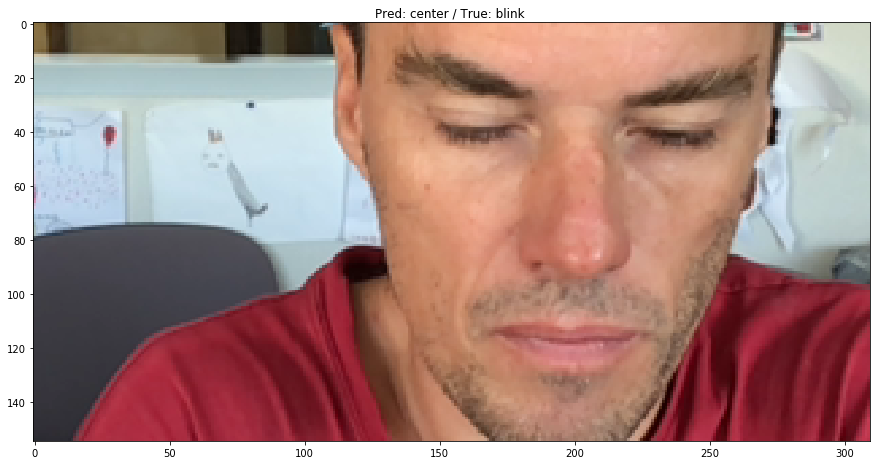

In [14]:
def view_image(wrong):
    filename = wrong['filename']
    filename_face = filename.replace(args.dataset_folder, args.dataset_faces_folder)
    img_face = imageio.imread(filename_face)
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    ax.imshow(img_face)
    ax.set_title('Pred: %s / True: %s ' % (wrong['pred_label'], wrong['target']))
    #plt.show()


view_image(wrongs[0])

In [15]:
import ipywidgets as widgets

widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)



ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

In [16]:
b=widgets.ToggleButtons(options=['Keep', 'Remove', 'Change'])
b


ToggleButtons(options=('Keep', 'Remove', 'Change'), value='Keep')

In [20]:

from IPython.display import display
from ipywidgets import interactive
def f(i, b):
    wrong = wrongs[i]
    view_image(wrong)
    filename = wrong['filename']
    filename_face = filename.replace(args.dataset_folder, args.dataset_faces_folder)

    if b == 'Remove':
        print('removing...', filename)
        os.remove(filename_face)
        os.remove(filename)
    elif b == 'Change':
        print('Changing...', filename, ' to ', filename.replace(wrongs[i]['target'], wrongs[i]['pred_label']))
        import shutil
        shutil.move(filename, filename.replace(wrongs[i]['target'], wrongs[i]['pred_label']))
        shutil.move(filename_face, filename_face.replace(wrongs[i]['target'], wrongs[i]['pred_label']))
    #display(b)
    return b

w = interactive(f, i=widgets.IntSlider(min=0, max=len(wrongs)-1, step=1, value=0), b=widgets.ToggleButtons(options=['Keep', 'Remove', 'Change']))
display(w)

interactive(children=(IntSlider(value=0, description='i', max=19), ToggleButtons(description='b', options=('Ke…

In [19]:
import shutil
help(shutil.move)

Help on function move in module shutil:

move(src, dst, copy_function=<function copy2 at 0x100774488>)
    Recursively move a file or directory to another location. This is
    similar to the Unix "mv" command. Return the file or directory's
    destination.
    
    If the destination is a directory or a symlink to a directory, the source
    is moved inside the directory. The destination path must not already
    exist.
    
    If the destination already exists but is not a directory, it may be
    overwritten depending on os.rename() semantics.
    
    If the destination is on our current filesystem, then rename() is used.
    Otherwise, src is copied to the destination and then removed. Symlinks are
    recreated under the new name if os.rename() fails because of cross
    filesystem renames.
    
    The optional `copy_function` argument is a callable that will be used
    to copy the source or it will be delegated to `copytree`.
    By default, copy2() is used, but any function

## showing the trained weights

https://github.com/utkuozbulak/pytorch-cnn-visualizations/blob/master/README.md


In [ ]:
child = ml.model.children()

convolayer = [i for i in ml.model.children()][1]
convolayer

weights = convolayer.weight.data.clone()
weights.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torchvision import utils

def plotkernel(tensor, figname, ch=0, allkernels=False, nrow=3, padding=1):
    n, c, w, h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    fig, ax = plt.subplots( figsize=(nrow,rows) )
    ax.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.setp(ax, xticks=[], yticks=[])

    plt.savefig(figname)

for i in range(2):
    convolayer = [i for i in ml.model.children()][i]
    weights = convolayer.weight.data.clone()
    plotkernel(weights, figname = 'kernel_layer' + str(i) + '.png')

    